### Convolutinal Neural Network
- 畳み込み処理により、人間の脳で行われているような抽象的な処理が可能に
- 昔は畳み込み処理に使うフィルターの中身は、人間が頑張って考えていたらしい。深層学習すげぇ
- NNの計算量のほとんどは特徴量選択に使われているらしい

#### 畳み込みNNと全結合NNは何がどう違うのか？
全結合NN：全結合→活性化関数→全結合→活性化関数→ ... →全結合→活性化→出力  
畳み込み：畳み込み→活性化→プール→畳み込み→活性化→プール→ ... →全結合→活性化→出力  

畳み込み；
- 画像の一部の範囲について、フィルターの値と内積計算、計算結果の行列を出力とする
- フィルター行列の値各々を重みwと捉え、誤差逆伝播法で学習する。
- 内積計算結果の各要素にbiasを足して計算することもできる。というかよくやるらしい？

プーリング；
- 画像の一部の範囲について、最大値や平均値を取る操作
- 位置のずれに対して強くなる

### 簡単なデータで畳み込み、プーリングしてみる

In [3]:
# import chainer
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [19]:
img = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]]) 
flt = np.array([[2,0,1],[0,1,2],[1,0,2]])
img, flt

(array([[1, 2, 3, 0],
        [0, 1, 2, 3],
        [3, 0, 1, 2],
        [2, 3, 0, 1]]),
 array([[2, 0, 1],
        [0, 1, 2],
        [1, 0, 2]]))

In [134]:
### Convolution
img_xform = np.zeros((4, 9))
img_xform[0] = img[0:3, 0:3].flatten()
img_xform[1] = img[0:3, 1:4].flatten()
img_xform[2] = img[1:4, 0:3].flatten()
img_xform[3] = img[1:4, 1:4].flatten()

flt_xform = flt.flatten()

img_xform, flt_xform

(array([[1., 2., 3., 0., 1., 2., 3., 0., 1.],
        [2., 3., 0., 1., 2., 3., 0., 1., 2.],
        [0., 1., 2., 3., 0., 1., 2., 3., 0.],
        [1., 2., 3., 0., 1., 2., 3., 0., 1.]]),
 array([2, 0, 1, 0, 1, 2, 1, 0, 2]))

In [143]:
img_convoluted = np.sum((flt[None, :] * img_xform), axis=1).reshape(2, 2)
img_convoluted


array([[15., 16.],
       [ 6., 15.]])

In [183]:
### Pooling
size = 2 # window size
stride = 2 # usually the same with window size

img_xform_pool = np.zeros((4, 4))
img_xform_pool[0] = img[0:size, 0:size].reshape(-1)
img_xform_pool[1] = img[0:size, 0+stride:size+stride].reshape(-1)
img_xform_pool[2] = img[0+stride:size+stride, 0:size].reshape(-1)
img_xform_pool[3] = img[0+stride:size+stride, 0+stride:size+stride].reshape(-1)
img_xform_pool

img_maxpool = np.max(img_xform_pool, axis=1).reshape(2, 2)
img_maxpool

array([[2., 3.],
       [3., 2.]])

### Clustering
- 似たものを集めて群を作る
- クラスタってのはよくマーケで使われる
- クラスタリングの正解は基本的には存在しない

#### 手法の一覧
- k-means
- X-means
- Gaussian Mixture Model
- Dirichlet process gaussian
k-meansは割と汎用性があるので、k-meansでどうしても太刀打ちできないときに他のモデルを検討すればいいらしい

#### k-means
概要
- 事前にk個のグループがあると想定（hyperparameter）
- k個のグループの中心点をランダムに配置
- 各データ点を、一番近い中心点が属するグループに割り当てる
- 誤差関数を計算して中心点の更新をする、以上を繰り返す

注意点
- 中心点の初期位置によっては満足な結果が得られない
- ランダム性を保ちつつも、できるだけ最初の中心点間の位置を離しておくk-means++法というのもある。初期値の決め方に何かしら上手い制約条件を加えているっぽい。
- 初期値違いで何セットが学習を回すのがデフォルト？

#### k-means++
- 入力データの中から初期の中心点をランダムに1個選択
- 中心点以外の入力データを対象に、各中心点との距離の2乗を求める。これを重みとして考慮しながら次の中心点をランダムに選択する。
- 中心点がk個になるまで繰り返す。
- 普通のk-means法を行う

誤差平方和の小ささ等をクラスタリング結果の評価指標にする場合もあるが、kの数にも依存する。  
総じて評価は難しいらしい。


### Hyperparameters optimization
#### Random search
- Gridを切らずにランダムにサーチする
- Grid searchよりも性能がいいことが多いらしい。

#### ベイズ最適化
- ハイパーパラメータを振った時のモデルの性能から、その他のハイパーパラメータの値を用いたときのモデルの性能を予測する（モデル性能の期待値と分散を得る）
- その結果を基に、次に探索すべきハイパーパラメータの値の検討を付けられるらしい。原理はちゃんと調べてない。



### 疑似データでk-means

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import make_blobs

c:\Users\masa_\anaconda3\envs\suai\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\Users\masa_\anaconda3\envs\suai\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_

,x1,x2,label
0,0.252924,4.356129,1
1,-1.003102,6.305140,1
2,0.159679,4.006479,1
3,-6.577477,2.077825,0
4,0.012106,6.080160,1


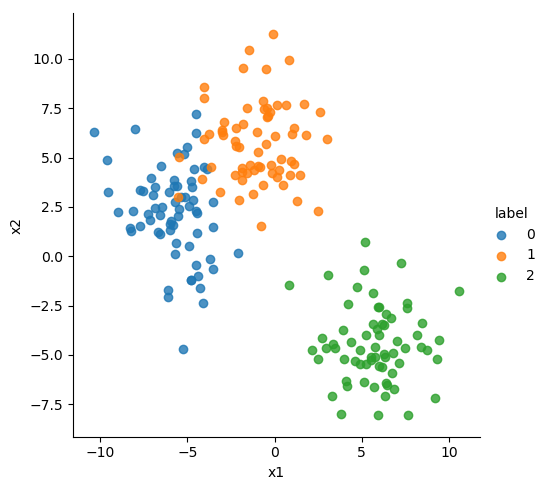

In [219]:
# 適当にクラスター形成するデータつくる
X, y = make_blobs(n_samples=200, centers=3, n_features=2,
                  cluster_std=2, random_state=1234)
df_data = pd.DataFrame(X, columns=["x1","x2"])
df_data["label"] = y
display(df_data.head())
sns.lmplot(x="x1", y="x2", hue="label", data=df_data,fit_reg=False)

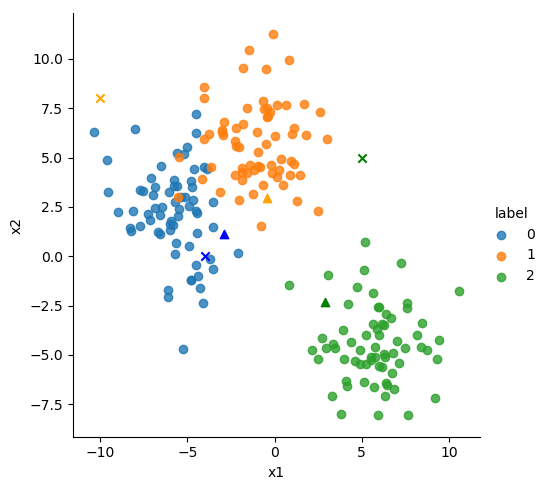

In [723]:
# 適当に初期位置を決める
c0, c1, c2 = np.array([-4, 0], dtype='float'), np.array([-10, 8], dtype='float'), np.array([5, 5], dtype='float')
centers = np.array([c0, c1, c2])

sns.lmplot(x="x1", y="x2", hue="label", data=df_data,fit_reg=False)
plt.scatter(x=c0[0], y=c0[1], c='b', marker='x')
plt.scatter(x=c1[0], y=c1[1], c='orange', marker='x')
plt.scatter(x=c2[0], y=c2[1], c='g', marker='x')

plt.scatter(x=-2.88137215, y=1.10338167, c='b', marker='^')
plt.scatter(x=-0.42822523, y=2.94975052, c='orange', marker='^')
plt.scatter(x=2.86124651, y=-2.29604987, c='g', marker='^')

In [890]:
N = len(X) # データ数
k = 3 # クラス数
f = 2 # 変数の数
alpha = 2 # 学習率

### 誤差を計算
deviation = np.zeros((N, k, 2))
for i in np.arange(N):
    deviation[i, :, :] = centers - X[i, :]

norm = np.linalg.norm(deviation, axis=2)
min_values = np.min(norm, axis=1)
min_locations = norm == min_values[:, None]

err = np.sum(norm * min_locations, axis=0) / N
err

### 誤差の微分値を計算
diff = np.zeros((N, k, 2))
for i in np.arange(N):
    diff[i,:,:] = 2*centers - X[None, i]

err_diff = np.sum(diff[:, :, :] * min_locations[:, :, None], axis=0) / N

### 中心点の更新
# print(c0, c1, c2)
centers -= alpha * err_diff

centers, err, np.linalg.norm(err)
# これをfor文で繰り返せばいいはず

(array([[-2.88127952,  1.10367861],
        [-0.42762697,  2.95000521],
        [ 2.88274177, -2.230103  ]]),
 array([1.32872416, 1.13415689, 1.39646369]),
 2.2364996278651503)

In [384]:
### 各データと、各中心点との距離を計算

N = len(X) # データ数
k = 3 # クラス数
f = 2 # 変数の数
alpha = 0.1 # 学習率

deviation = np.zeros((N, k, 2))
for i in np.arange(N):
    deviation[i, 0] = c0 - X[i]
    deviation[i, 1] = c1 - X[i]
    deviation[i, 2] = c2 - X[i]

norm = np.linalg.norm(deviation, axis=2)
# diff[1:5], norm[1:5]


### 誤差を計算
min_values = np.min(norm, axis=1)
min_locations = norm == min_values[:, None]

err = np.sum(norm * min_locations, axis=0) / N
err

### 誤差の微分値を計算
diff = np.zeros((N, k, 2))
for i in np.arange(N):
    diff[i, 0] = c0*2 - X[i]
    diff[i, 1] = c1*2 - X[i]
    diff[i, 2] = c2*2 - X[i]

# diff.shape, min_locations.shape
# diff[0:3, :, :], min_locations[0:3, :, None]
# diff[0:3, :, :] * min_locations[0:3, :, None]
err_diff = np.sum(diff[:, :, :] * min_locations[:, :, None], axis=0) / N

### 中心点の更新
print(c0, c1, c2)
c0 -= alpha * err_diff[0]
c1 -= alpha * err_diff[1]
c2 -= alpha * err_diff[2]

# これをfor文で繰り返せばいいはず

[-3.75497492  0.06922256] [-9.92594879  7.94509716] [4.73412698 4.58655132]


In [932]:
import scipy.spatial.distance as distance
import scipy.stats as stats
import numpy as np

def kneighbors(X_new, X, n_neighbors, metric='euclidean'):
    # dist = distance.pdist(X_new, X, metric)
    dist = distance.cdist(X_new, X, metric)
    # dist = distance.squareform(X_new, X, metric)
    # dist = distance.directed_hausdorff(X_new, X, metric)
    
    k = n_neighbors
    
    # neigh_ind = np.argmax(dist, k)[:,:k]
    neigh_ind = np.argpartition(dist, k)[:,:k]
    # neigh_ind = np.partition(dist, k)[:,:k]
    # neigh_ind = np.sort(dist, k)[:,:k]
    
    return neigh_ind

def predict(X_new, X, y, n_neighbors, metric='euclidean'):
    
    classes, _y = np.unique(y, return_inverse=True)
    
    neigh_ind = kneighbors(X_new, X, n_neighbors, metric)
    
    class_ind, _ = stats.mode(_y[neigh_ind], axis=1)
    # class_ind, _ = stats.mean(_y[neigh_ind], axis=1)
    # class_ind, _ = stats.max(_y[neigh_ind], axis=1)
    # class_ind, _ = stats.std(_y[neigh_ind], axis=1)
    
    # y_pred = classes.argmax(class_ind).ravel()
    # y_pred = classes.max(class_ind).ravel()
    # y_pred = classes.mode(class_ind).ravel()
    y_pred = classes.take(class_ind).ravel()
    
    return y_pred

X = np.array([[1, .5], [.5, .7], [.6, .3], [-.5, .4], [-.1, .6]])
X_new = np.array([[-1.0,.5], [-.1,.7], [.5,.7], [1.5,.6]])
y = ['cat', 'cat', 'cat', 'dog', 'dog']
y_pred = predict(X_new, X, y, n_neighbors=2)
print(y_pred)


['dog' 'dog' 'cat' 'cat']


In [986]:
import numpy as np
import scipy.spatial.distance as distance

def k_init(X, n_clusters):
    np.random.seed(12345)
    
    n_samples, n_features = X.shape
    
    # centers = np.empty((n_clusters), dtype=X.dtype)
    # centers = np.empty((n_features), dtype=X.dtype)
    centers = np.empty((n_clusters, n_features), dtype=X.dtype)
    # centers = np.empty((n_features, n_clusters), dtype=X.dtype)

    # center_id = np.random.randn(n_samples)
    center_id = np.random.randint(n_samples)
    # center_id = np.random.normal(n_samples)
    # center_id = np.random.sample(n_samples)

    centers[0] = X[center_id]
    closest_dist_sq = distance.cdist(X[[center_id]], X, metric='sqeuclidean')
    current_pot = closest_dist_sq.sum()
    
    for c in range(1, n_clusters):
        rand_val = np.random.random_sample(1) * current_pot
        
        # center_id = np.argmax(np.cumsum(closest_dist_sq), rand_val)
        center_id = np.searchsorted(np.cumsum(closest_dist_sq), rand_val)
        # center_id = np.argwhere(np.cumsum(closest_dist_sq), rand_val)
        # center_id = np.extract(np.cumsum(closest_dist_sq), rand_val)
        
        tmp_dist = distance.cdist(X[center_id], X, metric='sqeuclidean')
        
        # closest_dist_sq = np.min(closest_dist_sq, tmp_dist)
        closest_dist_sq = np.minimum(closest_dist_sq, tmp_dist)
        # closest_dist_sq = np.max(closest_dist_sq, tmp_dist)
        # closest_dist_sq = np.maximum(closest_dist_sq, tmp_dist)

        centers[c] = X[center_id]
        current_pot = closest_dist_sq.sum()
        
    return centers

X = np.array([
    [0,0], [1,0], [-1,0], 
    [0,1], [0,-1], [-1,1], [-1,-1], 
    [0,.5], [.5,.5], [.5,0], 
    [1,2], [-1,2], [-2,-2], 
    [-3,3], [-2,0], [2,-2]
])
n_clusters = 3
centers = k_init(X, n_clusters)
print(centers)


[[-1.  0.]
 [ 2. -2.]
 [ 0. -1.]]


In [1101]:
import numpy as np
import pandas as pd

math = np.array([41, 37, 40, 30, 40, 60, 46, 61, 67, 68, 55, 61, 59, 66, 69])
physics = np.array([26, 32, 31, 24, 60, 40, 26, 27, 33, 25, 26, 30, 29, 37, 41])
X = np.vstack((math, physics)).T
# X_new = pca(X, n_components=1)
# A = X - X.mean(axis=0)

def svd(A):
    B = np.dot(A.T, A)
    eigen_values, eigen_vectors = np.linalg.eig(B)
    # eigen_values, eigen_vectors = np.linalg.cholesky(B) # わんちゃん
    
    singular_values = np.sqrt(eigen_values)
    
    singular_index = np.argsort(singular_values)[::-1]
    # singular_index = np.argsort(singular_values)[::0] # これはエラー
    # singular_index = np.argsort(singular_values)[::1] # エラー
    # singular_index = np.argsort(singular_values)[::2] # エラー
    
    S = np.diagflat(singular_values[singular_index])
    # S = np.diagonal(singular_values[singular_index]) # エラー
    # S = np.trace(singular_values[singular_index]) # エラー
    # S = np.triu(singular_values[singular_index])
    
    V = eigen_vectors[:, singular_index]
    
    # dig = S.diagflat() # エラー
    dig = S.diagonal()
    # dig = S.trace() # エラー
    # dig = S.tril() # エラー
    
    U = [np.dot(A, V[:,i]) / dig[i] for i in range(len(dig))]
    U = np.array(U).T
    
    return U, S, V

def pca(X, n_components):
    X = X - X.mean(axis=0)
    U, S, V = svd(X)
    n = n_components
    
    ##### X_new = X * V = U * S* V^T* V = U * S
    X_new = np.dot(U[:,:n], S[:n,:n])
    # X_new = np.dot(S[:n,:n], S[:,:n])
    # X_new = np.dot(U[:,:n].T, S[:n,:n])
    # X_new = np.dot(S[:n,:n], S[:,:n].T)
    
    return X_new

X_new = pca(X, n_components=1)
print(X_new.shape)
print(X_new)

(15, 1)
[[-12.50951953]
 [-16.33999601]
 [-13.3691643 ]
 [-23.56119428]
 [-12.55737682]
 [  6.87493232]
 [ -7.51147889]
 [  7.51063571]
 [ 13.67624051]
 [ 14.45190727]
 [  1.48499427]
 [  7.59461373]
 [  5.5674048 ]
 [ 12.78860307]
 [ 15.89939814]]
